Cifar-10 was formed for research purposes. Contains 60k (32 by 32) of 10 different classes of colored images.


In [25]:
## Loading Libraries

import matplotlib.pyplot as plt
from keras.datasets import cifar10
import sys
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import Dropout

### Loading Data

train data (50000, 32, 32, 3)
test data (10000, 32, 32, 3)
Few Images


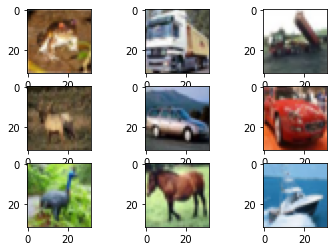

In [2]:
(train_img, train_labels), (test_img, test_labels) = cifar10.load_data()

print('train data', train_img.shape) #50k
print('test data', test_img.shape)   #10k

print('Few Images')
for i in range(9):
    plt.subplot(330+1+i)
    
    #plot raw pixel data
    plt.imshow(train_img[i])
plt.show()

Epoch 1/20
391/391 [==============================] - 47s 119ms/step - loss: 1.8342 - accuracy: 0.3464 - val_loss: 1.6130 - val_accuracy: 0.4321
Epoch 2/20
391/391 [==============================] - 47s 120ms/step - loss: 1.5287 - accuracy: 0.4630 - val_loss: 1.4711 - val_accuracy: 0.4756
Epoch 3/20
391/391 [==============================] - 46s 118ms/step - loss: 1.3930 - accuracy: 0.5052 - val_loss: 1.3474 - val_accuracy: 0.5212
Epoch 4/20
391/391 [==============================] - 45s 116ms/step - loss: 1.2949 - accuracy: 0.5442 - val_loss: 1.2718 - val_accuracy: 0.5527
Epoch 5/20
391/391 [==============================] - 50s 127ms/step - loss: 1.2216 - accuracy: 0.5694 - val_loss: 1.2323 - val_accuracy: 0.5617
Epoch 6/20
391/391 [==============================] - 51s 131ms/step - loss: 1.1675 - accuracy: 0.5907 - val_loss: 1.1817 - val_accuracy: 0.5838
Epoch 7/20
391/391 [==============================] - 50s 128ms/step - loss: 1.1176 - accuracy: 0.6090 - val_loss: 1.1445 - val_ac

TypeError: 'dict' object is not callable

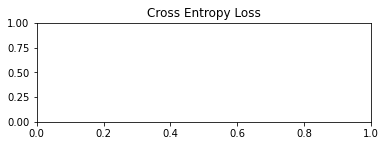

In [5]:
# One Hot encoding of target labels
trainY = to_categorical(train_labels)
testY = to_categorical(test_labels)

train = train_img.astype('float32')
test = test_img.astype('float32')

#normalize between 0-1
trainX = train/255
testX = test/255

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))

#compile model
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(trainX, trainY, epochs = 20, verbose = 1, batch_size = 128, validation_data = (testX, testY))
#Evaluate Model
_, train_acc = model.evaluate(trainX, trainY, verbose = 0)
_, test_acc = model.evaluate(testX, testY, verbose = 0)

print('Accuracy on train set', train_acc)
print('Accuracy on test set', test_acc)



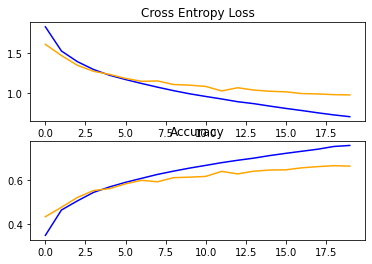

In [13]:
#plot graphs - loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], label = 'train', color = 'blue')
plt.plot(history.history['val_loss'], label = 'test', color = 'orange')

#graph - accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train', color = 'blue')
plt.plot(history.history['val_accuracy'], label = 'test', color = 'orange')

In [ ]:
#3 - VGG Model

In [29]:
# One Hot encoding of target labels
trainY = to_categorical(train_labels)
testY = to_categorical(test_labels)

train = train_img.astype('float32')
test = test_img.astype('float32')

#normalize between 0-1
trainX = train/255
testX = test/255

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2))) 
model.add(Conv2D(128, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))   
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))

#compile model
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(trainX, trainY, epochs = 20, verbose = 1, batch_size = 128, validation_data = (testX, testY))
#Evaluate Model
_, train_acc = model.evaluate(trainX, trainY, verbose = 0)
_, test_acc = model.evaluate(testX, testY, verbose = 0)

print('Accuracy on train set', train_acc)
print('Accuracy on test set', test_acc)



Epoch 1/20
391/391 [==============================] - 104s 265ms/step - loss: 1.9253 - accuracy: 0.3000 - val_loss: 1.6800 - val_accuracy: 0.3894
Epoch 2/20
391/391 [==============================] - 110s 281ms/step - loss: 1.5392 - accuracy: 0.4454 - val_loss: 1.5011 - val_accuracy: 0.4622
Epoch 3/20
391/391 [==============================] - 110s 281ms/step - loss: 1.3795 - accuracy: 0.5071 - val_loss: 1.2890 - val_accuracy: 0.5416
Epoch 4/20
391/391 [==============================] - 110s 281ms/step - loss: 1.2648 - accuracy: 0.5510 - val_loss: 1.2811 - val_accuracy: 0.5397
Epoch 5/20
391/391 [==============================] - 113s 290ms/step - loss: 1.1749 - accuracy: 0.5863 - val_loss: 1.1543 - val_accuracy: 0.5866
Epoch 6/20
391/391 [==============================] - 115s 294ms/step - loss: 1.0965 - accuracy: 0.6132 - val_loss: 1.1246 - val_accuracy: 0.6095
Epoch 7/20
391/391 [==============================] - 110s 282ms/step - loss: 1.0357 - accuracy: 0.6371 - val_loss: 1.0531 -

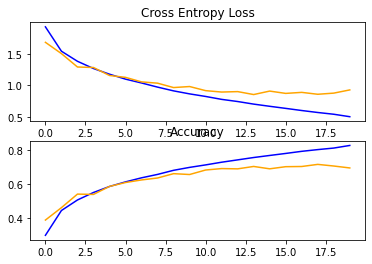

In [30]:
#plot graphs - loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], label = 'train', color = 'blue')
plt.plot(history.history['val_loss'], label = 'test', color = 'orange')

#graph - accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train', color = 'blue')
plt.plot(history.history['val_accuracy'], label = 'test', color = 'orange')

### Regularization - Model seems overfitting at around 15 epochs so we try regularization. 3VGG model can be set as benchmark model

1) Drop Out - will add 20% drop out after each maxpool layer

In [ ]:
# One Hot encoding of target labels
trainY = to_categorical(train_labels)
testY = to_categorical(test_labels)

train = train_img.astype('float32')
test = test_img.astype('float32')

#normalize between 0-1
trainX = train/255
testX = test/255

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',  padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',  padding = 'same'))
model.add(MaxPooling2D((2,2)))   
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

#compile model
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(trainX, trainY, epochs = 20, verbose = 1, batch_size = 128, validation_data = (testX, testY))
#Evaluate Model
_, train_acc = model.evaluate(trainX, trainY, verbose = 0)
_, test_acc = model.evaluate(testX, testY, verbose = 0)

print('Accuracy on train set', train_acc)
print('Accuracy on test set', test_acc)

#plot graphs - loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], label = 'train', color = 'blue')
plt.plot(history.history['val_loss'], label = 'test', color = 'orange')

#graph - accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train', color = 'blue')
plt.plot(history.history['val_accuracy'], label = 'test', color = 'orange')


#fit model
history = model.fit(trainX, trainY, epochs = 20, verbose = 1, batch_size = 128, validation_data = (testX, testY))

#Evaluate Model
_, train_acc = model.evaluate(trainX, trainY, verbose = 0)
_, test_acc = model.evaluate(testX, testY, verbose = 0)

print('Accuracy on train set', train_acc)
print('Accuracy on test set', test_acc)

Dropout performed well till 40-50 epochs and become saturated. Could add earlystopping and and find this epoch value 
and use that to train till this and use it to evaluate results. Can slow learning rate or play with more dropout values.



2) Weight Decay - it penalizes model in proportion to weights shrinkage. 

In [28]:
# We can better the performance with 2 and 3 VGG blocks instead of one
# load training and test data
def load_dataset():
    (train_img, train_labels), (test_img, test_labels) = cifar10.load_data()

    #one hot encode them
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    
    return train_img, train_labels, test_img, test_labels

# scale input images/pixels
def scaling(train_img, test_img):
    train = train_img.astype('float32')
    test = test_img.astype('float32')
    
    #normalize between 0-1
    train_norm = train/255
    test_norm = test/255
    
    return train_norm, test_norm

# define model - Benchmark model would be VGG model with one layer. 
#The architecture involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer. 
'''Together, these layers form a block, and these blocks can be repeated where the number of filters in each block is increased 
with the depth of the network such as 32, 64, 128, 256 for the first four blocks of the model. 
Padding is used on the convolutional layers to ensure the height and width of the output feature maps matches the inputs.'''

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = l2(0.001),padding = 'same', input_shape = (32,32,3)))
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = l2(0.001),padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = l2(0.001),padding = 'same'))
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = l2(0.001),padding = 'same'))
    model.add(MaxPooling2D((2,2))) 
    model.add(Conv2D(128, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = l2(0.001), padding = 'same'))
    model.add(Conv2D(128, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = l2(0.001), padding = 'same'))
    model.add(MaxPooling2D((2,2)))   
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = l2(0.001)))
    model.add(Dense(10, activation = 'softmax'))
    
    #compile model
    opt = SGD(learning_rate = 0.001, momentum = 0.9)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

#define summary diagnositics
def summary_diagnostics(history):
    
    #plot graphs - loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], label = 'train', color = 'blue')
    plt.plot(history.history['val_loss'], label = 'test', color = 'orange')
    
    #graph - accuracy
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label = 'train', color = 'blue')
    plt.plot(history.history['val_accuracy'], label = 'test', color = 'orange')

    #save plot to a file
#     filename = sys.argv[0].split('/')[-1]
#     plt.savefig(filename + '_plot.png')
#     plt.close()

# run the test harness - to evaluate train-test performances(loss and accuracy)
def run_test_harness():
    #load data
    trainX, trainY, testX, testY = load_dataset()
    
    #scale data
    trainX, trainY = scaling(trainX, trainY)
    
    #define model
    model = build_model()

    #fit model
    history = model.fit(trainX, trainY, epochs = 60, verbose = 1, batch_size = 128, validation_data = (testX, testY))
    
    #Evaluate Model
    _, train_acc = model.evaluate(trainX, trainY, verbose = 0)
    _, test_acc = model.evaluate(testX, testY, verbose = 0)
    
    print('Accuracy on train set', train_acc)
    print('Accuracy on test set', test_acc)
    
    #Summarize diagnostics
    summary_diagnostics(history)
    
# run test harness
run_test_harness()

NameError: name 'l2' is not defined

If results not great than can try large weights  

3) Data Augmentation - try adding copies of training instances with small changes. Won't change much as images are small so much change can distory the image.

Will do small changes like horizontal flipping images, small zooming/cropping, 10% shifts in the height and width of the image. Shear, fill_mode.

In [ ]:
# We can better the performance with 2 and 3 VGG blocks instead of one
# load training and test data
def load_dataset():
    (train_img, train_labels), (test_img, test_labels) = cifar10.load_data()

    #one hot encode them
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    
    return train_img, train_labels, test_img, test_labels

# scale input images/pixels
def scaling(train_img, test_img):
    train = train_img.astype('float32')
    test = test_img.astype('float32')
    
    #normalize between 0-1
    train_norm = train/255
    test_norm = test/255
    
    return train_norm, test_norm

# define model - Benchmark model would be VGG model with one layer. 
#The architecture involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer. 
'''Together, these layers form a block, and these blocks can be repeated where the number of filters in each block is increased 
with the depth of the network such as 32, 64, 128, 256 for the first four blocks of the model. 
Padding is used on the convolutional layers to ensure the height and width of the output feature maps matches the inputs.'''

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',padding = 'same', input_shape = (32,32,3)))
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(MaxPooling2D((2,2))) 
    model.add(Conv2D(128, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',  padding = 'same'))
    model.add(Conv2D(128, (3,3), activation = 'relu', kernel_initializer = 'he_uniform',  padding = 'same'))
    model.add(MaxPooling2D((2,2)))   
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    
    #compile model
    opt = SGD(learning_rate = 0.001, momentum = 0.9)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

#define summary diagnositics
def summary_diagnostics(history):
    
    #plot graphs - loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], label = 'train', color = 'blue')
    plt.plot(history.history['val_loss'], label = 'test', color = 'orange')
    
    #graph - accuracy
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label = 'train', color = 'blue')
    plt.plot(history.history['val_accuracy'], label = 'test', color = 'orange')

    #save plot to a file
#     filename = sys.argv[0].split('/')[-1]
#     plt.savefig(filename + '_plot.png')
#     plt.close()


# run the test harness - to evaluate train-test performances(loss and accuracy)
def run_test_harness():
    #load data
    trainX, trainY, testX, testY = load_dataset()
    
    #scale data
    trainX, trainY = scaling(trainX, trainY)
    
    #define model
    model = build_model()
    
    #create data generator
    datagen = ImageDataGenerator(width_shift_range = 0.1, height_width_range = 0.1, horizontal_flip = True)
    
    #prepare iterator 
    it_train = datagen.flow(trainX, trainY, batch_size = 64)
    
    #fit_model
    steps = int(trainX.shape[0]/64)

    #fit model
    history = model.fit(trainX, trainY, steps_per_epoch = steps, epochs = 50, verbose = 0, batch_size = 64, validation_data = (testX, testY))
    
    #Evaluate Model
    _, train_acc = model.evaluate(trainX, trainY, verbose = 0)
    _, test_acc = model.evaluate(testX, testY, verbose = 0)
    
    print('Accuracy on train set', train_acc)
    print('Accuracy on test set', test_acc)
    
    #Summarize diagnostics
    summary_diagnostics(history)
    
# run test harness
run_test_harness()

In [ ]:
Huge improvement in accuracy similar to drop out. May be using both dropout and Data Augmentation results better.